## Data preparation and cleaning

### Missing values

In [26]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values to fill

## Reduce the skewness 

In [27]:
wine['chlorides'] = np.log10(wine['chlorides'])
wine['sulphates'] = np.log10(wine['sulphates'])

In [28]:
print('--------------------')
print('Skewness of the data:')
print('--------------------')
round(wine.skew(),2)

--------------------
Skewness of the data:
--------------------


fixed acidity           0.89
volatile acidity        0.68
citric acid             0.32
residual sugar          0.98
chlorides               1.80
free sulfur dioxide     1.01
total sulfur dioxide    1.24
density                -0.16
pH                      0.22
sulphates               0.97
alcohol                 0.88
quality                 0.24
dtype: float64

### Reclassify the quality scores

In [29]:
def quality_class(x):
    if x <= 5:
        return 0
    else:
        return 1
    
wine['quality'] = wine.quality.apply(quality_class)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,-1.119186,11.0,34.0,0.9978,3.51,-0.251812,9.4,0
1,7.8,0.88,0.00,2.6,-1.008774,25.0,67.0,0.9968,3.20,-0.167491,9.8,0
2,7.8,0.76,0.04,2.3,-1.036212,15.0,54.0,0.9970,3.26,-0.187087,9.8,0
3,11.2,0.28,0.56,1.9,-1.124939,17.0,60.0,0.9980,3.16,-0.236572,9.8,1
4,7.4,0.70,0.00,1.9,-1.119186,11.0,34.0,0.9978,3.51,-0.251812,9.4,0


<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14fa38290>,
 [Text(-0.6036615452396723, -0.9195611664260573, '1'),
  Text(0.6036614591441399, 0.919561222944926, '0')],
 [Text(-0.32926993376709396, -0.5015788180505767, '53.7%'),
  Text(0.3292698868058945, 0.5015788488790506, '46.3%')])

Text(0.5, 1.0, 'Distribution of Wine Quality')

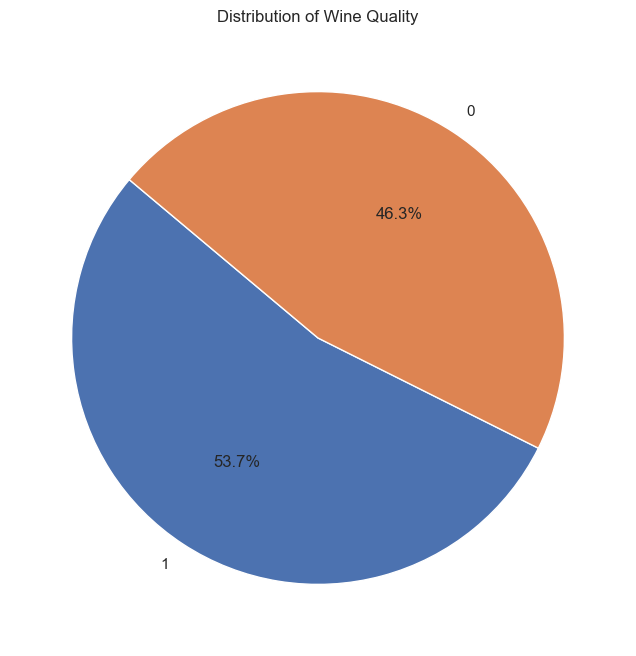

In [30]:
quality_counts = wine['quality'].value_counts()
plt.figure(figsize=(8, 8))  # Set the figure size as desired
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality')
plt.show()

## Data scaling

In [31]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
         'density', 'pH', 'sulphates', 'alcohol']

scaler = MinMaxScaler()
wine[columns] = scaler.fit_transform(wine[columns])